In [1]:
import matplotlib.pyplot as plt

from skrt import Patient

path = "/Users/karl/data/head_and_neck/consolidation/VT1_H_00BE02K1"
p = Patient(path)

In [2]:
# Extract earliest image of type "ct". 
im = p.combined_objs("ct_images")[0]

# Estract earliest structure set associated with CT image.
ss = im.structure_sets[0]

# Extract earliest LA3 dose.
dose = p.combined_objs("la3_doses")[0]

In [3]:
# Set Matplotlib runtime configuration.
# For details of Matplotlib configuration, see:
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# Sizes are in points.

# For axes, set spacing (pad) and size of label and title
plt.rc("axes", labelpad=0, labelsize=25, titlepad=17, titlesize=25)

# Set default text charactieristics.
# Possible weight values are:
# 100, 200, 300, 400 / "normal", 500, 600, 700 / "bold", 800, 900.
plt.rc("font", family="serif", serif=["Times"], size=20, weight=400)

# Set mathematics typeface when using matplotlib's built-in fonts.
plt.rc("mathtext", fontset="dejavuserif")

# Use TeX/LaTeX for typesetting.  (This requires working TeX/LaTeX installation.)
plt.rc("text", usetex=True)

# For ticks, set label size and direction ("in", "out", "inout").
plt.rc(("xtick", "ytick"), labelsize=25, direction="out")

# For major and minor ticks, set size and width.
# For major ticks, set spacing (pad) of label.
plt.rc(("xtick.major"), pad=3)
plt.rc(("xtick.major", "ytick.major"), size=9, width=1.0)
plt.rc(("xtick.minor", "ytick.minor"), size=4.5, width=1.0)
plt.rc(("ytick.major"), pad=2)

# Create dictionary of BetterViewer image-display options.
kwargs = {
    # Set figure size in inches.
    "figsize": (10, 6),
    # Show major ticks at specified interval (axis units).
    "major_ticks": 60,
    # Show minor ticks for specified number of intervals between major ticks.
    "minor_ticks": 5,
    # Indicate whether axis units should be mm or numbers of voxels.
    "scale_in_mm" : True,
    # Indicate whether ticks should be shown on all sides.
    "ticks_all_sides": True,
    # Specify zoom factor.
    "zoom": 2.0,
}

# Set default colour map and opacity for dose.
# Use inverted greyscale, so that denser material is darker.
dose.image._default_cmap = "binary"
dose._default_opacity = 0.5

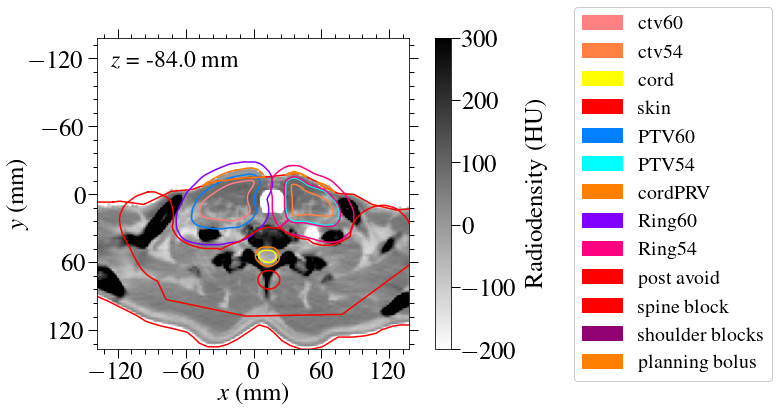

In [4]:
# Plot image with structure set overlain, and with off-image legend.

# Overlay default annotation, in black, at default position.
# For list of named colours, see:
#     https://matplotlib.org/stable/gallery/color/named_colors.html
kwargs["annotate_slice"] = {"color": 'black'}

# Plot image:
# sl=70 : plot slice 70;
# title="" : omit title;
# rois=ss : overlay structure set;
# colorbar=1 : show colour bar for image.
# legend=True : show legend identifying ROIs of structure set.
# legend_loc="center left" : Use centre left of legend as reference point for fixing its location.
# legend_bbox_to_anchor=(1.5, 0.5) : Coordinates of legend reference point, in system where image axes extend from 0 to 1.

im.plot(sl=70, title="", rois=ss, colorbar=1, legend=True, legend_loc="center left", legend_bbox_to_anchor=(1.5, 0.5), **kwargs)

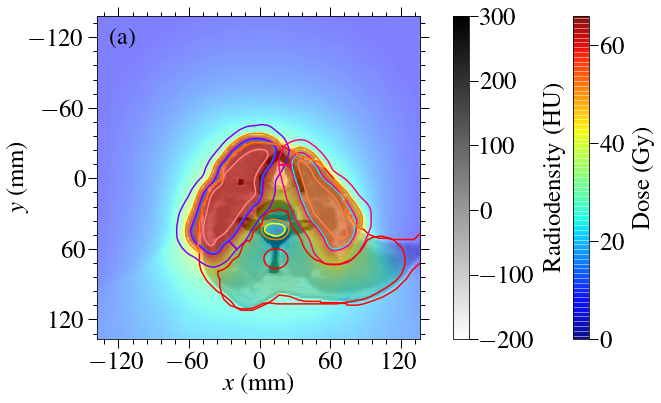

In [5]:
# Plot image with dose and structure set overlain, and with colour bars.

# Overlay user-defined annotation, in black, at default position.
# For list of named colours, see:
#     https://matplotlib.org/stable/gallery/color/named_colors.html
kwargs["annotate_slice"] = {"text": "(a)", "color": 'black'}

# Plot image:
# sl=60 : plot slice 60;
# title="" : omit title;
# dose=dose : olverlay dose;
# rois=ss : overlay structure set;
# colorbar=2 : show colour bars for image and overlay.
im.plot(sl=60, title="", dose=dose, rois=ss, colorbar=2, **kwargs)

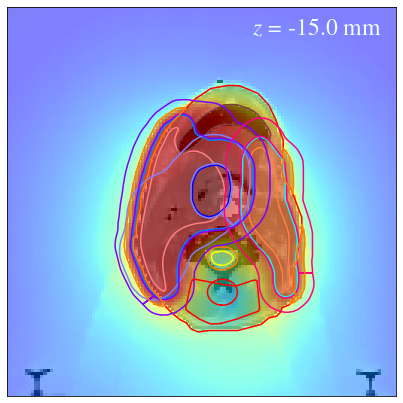

In [6]:
# Plot single slice without axis annotations.
# In contrast with plotting for no_axis_labels=True, the axes themselves are shown.

# Set tick marks to have zero size.
plt.rc(("xtick.major", "ytick.major"), size=0)
plt.rc(("xtick.minor", "ytick.minor"), size=0)

# Suppress axis and tick labels.
kwargs["no_xlabel"] = True
kwargs["no_xtick_labels"] = True
kwargs["no_ylabel"] = True
kwargs["no_ytick_labels"] = True

# Overlay default slice information, in azure, at user-defined position.
# For list of named colours, see:
#     https://matplotlib.org/stable/gallery/color/named_colors.html
kwargs["annotate_slice"] = {'text': None, 'color': 'azure', 'xy': (0.63, 0.93)}

# Plot image:
# pos=-15 : plot slice at z=-15 mm;
# title="" : omit title;
# dose=dose : olverlay dose;
# rois=ss : overlay structure set;
im.plot(pos=-15, title="", dose=dose, rois=ss, **kwargs)

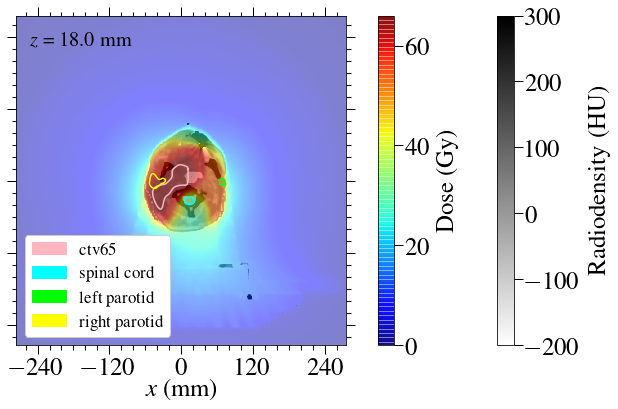

In [7]:
# Filter rois:
rois = ss.filtered_copy({"ctv65": "ctv65", "spinal cord": "cord", "left parotid" : "L parotid", "right parotid": "R parotid"}, keep_renamed_only=True)
roi_colours = {"ctv65": "lightpink", "spinal cord": "cyan", "left parotid": "lime", "right parotid": "yellow"}
for roi in rois:    
    roi.set_color(roi_colours[roi.name])

# For major and minor ticks, set size and width.
plt.rc(("xtick.major", "ytick.major"), size=9, width=1.0)
plt.rc(("xtick.minor", "ytick.minor"), size=4.5, width=1.0)
    
# Set default font size - small enough that legend doesn't obscure image.
plt.rc("font", size=17)
    
# Suppress axis and tick labels for y axis.
kwargs["no_xlabel"] = False
kwargs["no_xtick_labels"] = False
kwargs["no_ylabel"] = True
kwargs["no_ytick_labels"] = True

# Show major ticks at specified interval (axis units).
kwargs["major_ticks"] = 120
# Show minor ticks at specified interval (axis units).
kwargs["minor_ticks"] = 6

# Specify zoom factor.
kwargs["zoom"] = 1.0

# Overlay default annotation, in black, at default position.
# For list of named colours, see:
#     https://matplotlib.org/stable/gallery/color/named_colors.html
kwargs["annotate_slice"] = {"color": 'black'}

# Plot dose:
# pos=18 : plot slice at z=18;
# title="" : omit title;
# include_image=True : underlay associated image;
# rois=rois : overlay filtered structure set;
# colorbar=2 : show colour bars for dose and underlay.
#     => Note that when plotting a dose with image underlay the order of the colour bars is reversed
#        with resect to plotting an image with dose overlay.
# legend=True : show legend identifying ROIs of structure set.
dose.plot(pos=18, title="", include_image=True, rois=rois, colorbar=2, legend=True, **kwargs)

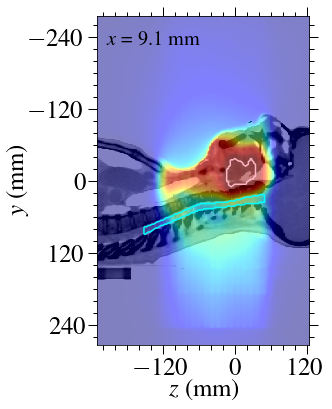

In [8]:
# Include axis and tick labels for both axes
kwargs["no_xlabel"] = False
kwargs["no_xtick_labels"] = False
kwargs["no_ylabel"] = False
kwargs["no_ytick_labels"] = False

# Plot image in y-z plane:
# pos=9.1 : plot slice at x=9.1;
# title="" : omit title;
# dose=dose : olverlay dose;
# rois=rois : overlay filtered structure set;
# colorbar=0 : omit colour bars.
im.plot(view="y-z", pos=9.1, title="", dose=dose, rois=rois, colorbar=0, **kwargs)

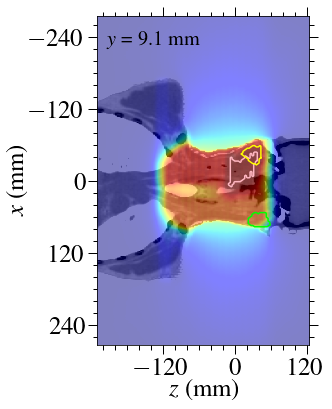

In [9]:
# Plot image in x-z plane:
# pos=9.1 : plot slice at y=9.1;
# title="" : omit title;
# dose=dose : olverlay dose;
# rois=rois : overlay filtered structure set;
# colorbar=0 : omit colour bars.
im.plot(view="x-z", pos=9.1, title="", dose=dose, rois=rois, colorbar=0, **kwargs)